### Data has always been a big part of healthcare and insurance industries. To establish a better health care system, there is a need to estimate the cost of health insurance. The prediction of the cost is one possibility to improve health care development. Big data analytics has potential for benefit for everyone in the value chain Provider, Payer and the Patient.

### The given data had a few missing values and outliers. This data shows a strong relationship between BMI, age and the cost of health insurance. In this project I have used Linear Regression, Support Vector Machine, Random Forest.


---



In [107]:
#importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
df = pd.read_excel("/content/Health_insurance_cost.xlsx")#reading the dataframe
df.head() #viewing the first five rows and columns

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


### Gathering some very basic information about given data.

In [108]:
df.shape

(1338, 7)

In [109]:
df.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   float64
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [115]:
df.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

### **DATA** **CLEANING** : Dropping the duplicates and imputing the missing values using MICE imputer. 

### We need to convert categorical data like gender, smoking status and location into numerical data before replcaing the missing data

In [112]:
df['gender']= df.gender.map({'male': 0, 'female': 1})
df['smoking_status']= df.smoking_status.map({'yes': 0, 'no': 1})
df['location']= df.location.map({'southwest': 0, 'southeast': 1,'northwest' : 2, 'northeast': 3})

### MICE algorithm imputes missing values in a dataset by looking at data from other columns and trying to estimate the best prediction for each missing value.

In [113]:
!pip install fancyimpute
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
df_mice = df.copy(deep = True)
df.iloc[:,:]=MICE_imputer.fit_transform(df_mice)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### We check for null values once again.

In [116]:
df.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

The histogram given below is right skewed. This shows that the prices are not normally distributed.

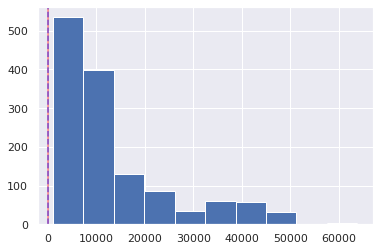

In [126]:
plt.hist(df['health_insurance_price'])
plt.axvline(x=df.BMI.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=df.BMI.median(),c='blue',ls='--',alpha=0.5,label='Median')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


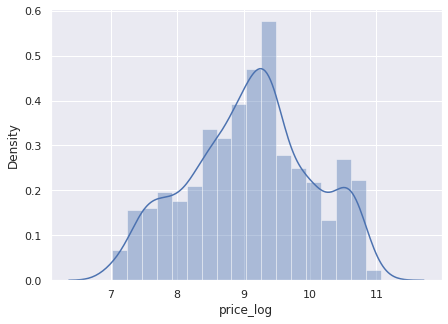

In [232]:
df['price_log'] = np.log(df['health_insurance_price'])
sns.distplot(df['price_log'])

### **DATA** **VISUALIZATION** : 

As one can see BMI and age show a strong relationship towards health insurance price.

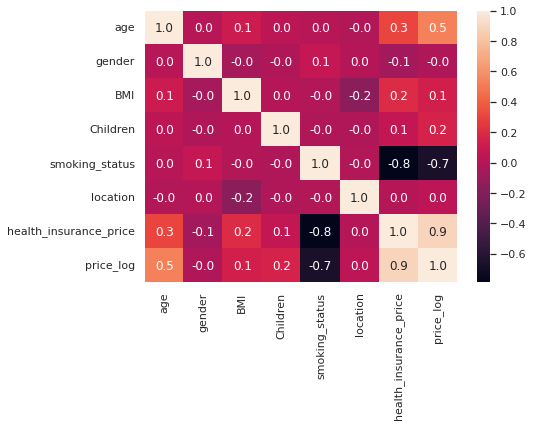

In [233]:
sns.heatmap(df.corr(), annot=True, fmt='.1f')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


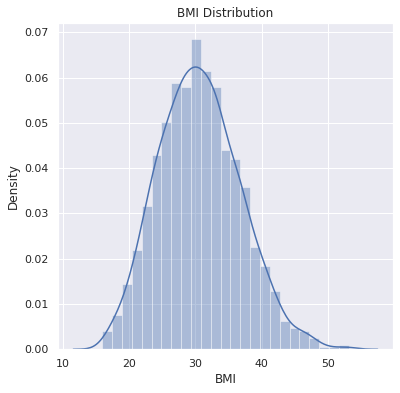

In [69]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['BMI'])
plt.title('BMI Distribution')
plt.show()

Here we see histograms of all independent variables with dependent variable or target variable. Avoid the histograms of categorical features in this.

['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location', 'health_insurance_price', 'price_log']


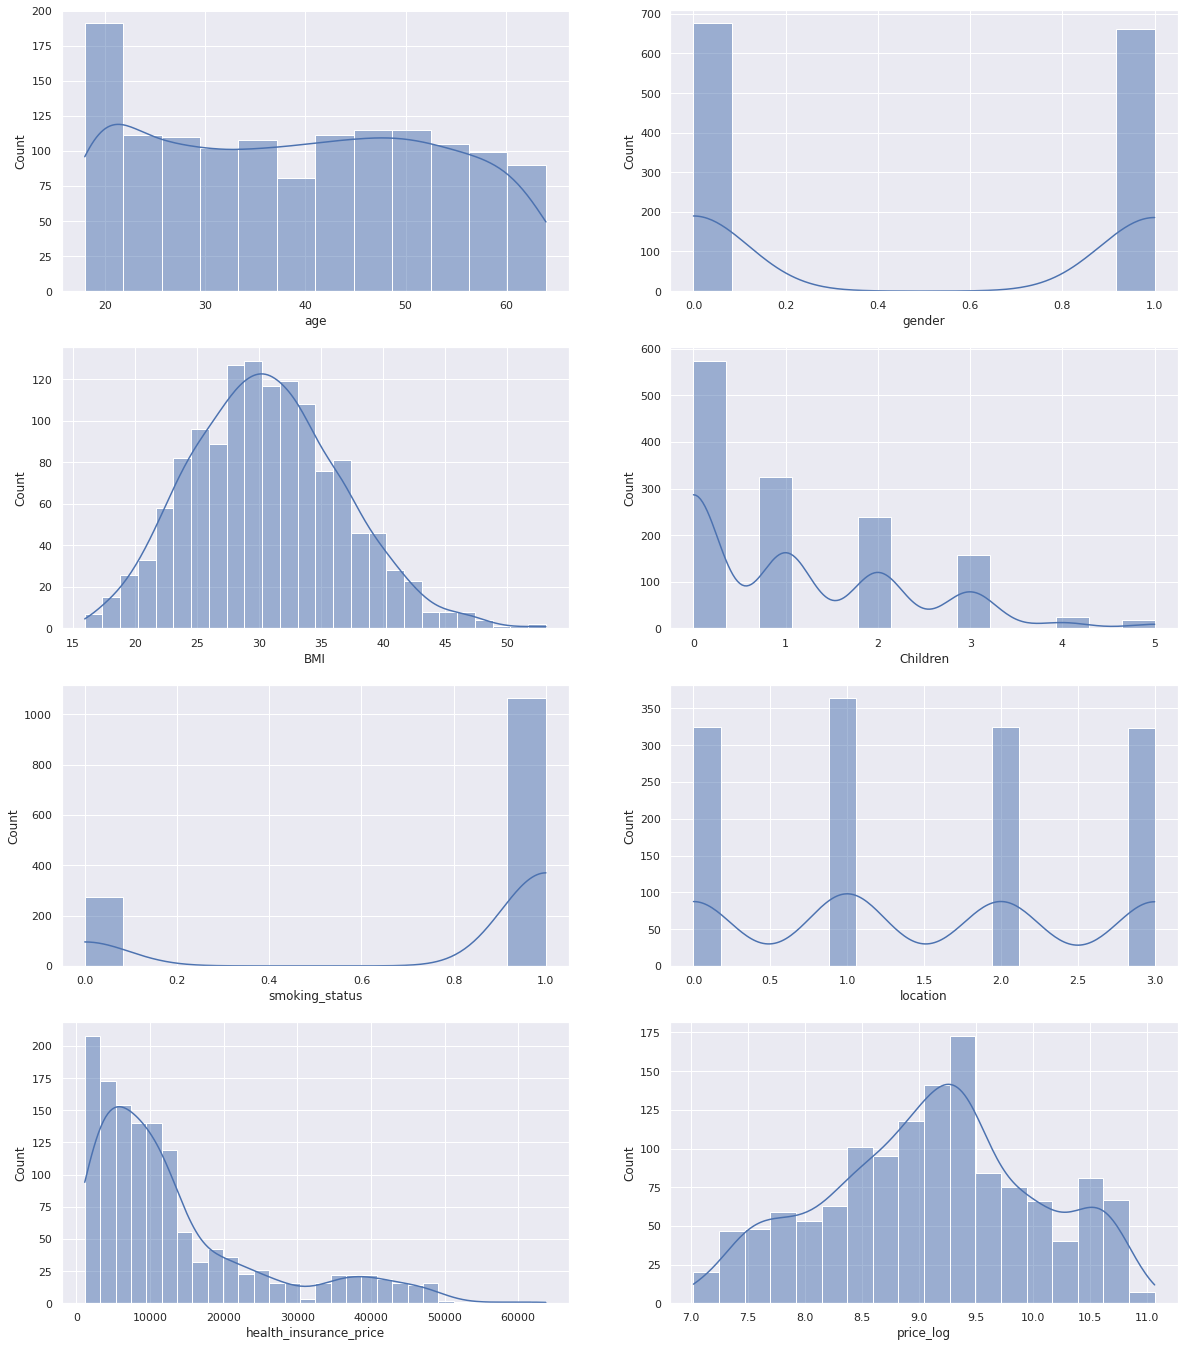

In [234]:
independent_features=[feature for feature in df.columns if feature not in ['Outcome']]
print(independent_features)
plt.figure(figsize=(20,30))
for i in enumerate(independent_features):
  plt.subplot(5, 2, i[0]+1)
  sns.set(rc={'figure.figsize':(7,5)})
  sns.histplot(data=df, x=i[1], kde=True)




**REGRESSION** : Here we are using multiple regression model since we have multiple independent variables.







In [235]:
X = df[['BMI','age','gender','Children','smoking_status','location']]
Y = df['price_log']

Spliting the data into test and train

In [236]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [237]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [238]:
# loading the Linear Regression model
regressor = LinearRegression()

Feature Scaling


In [239]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-1.42342781, -1.34192511,  1.01886959, -0.93004238,  0.50729114,
         1.3755987 ],
       [ 0.03150243, -0.18151923, -0.98147988,  1.56197434,  0.50729114,
         0.47148899],
       [ 0.4018937 ,  1.34151348,  1.01886959, -0.93004238,  0.50729114,
        -1.33673044],
       ...,
       [ 2.116514  ,  1.55908958, -0.98147988, -0.93004238,  0.50729114,
        -1.33673044],
       [-0.81332262,  0.1770423 ,  1.01886959, -0.09937014,  0.50729114,
        -1.33673044],
       [ 0.28453377,  1.34151348,  1.01886959, -0.09937014,  0.50729114,
         1.3755987 ]])

In [240]:
X_test=sc.transform(X_test)
X_test

array([[-1.13876754, -1.19687437, -0.98147988, -0.93004238,  0.50729114,
         1.3755987 ],
       [-0.14245662,  1.12393738,  1.01886959, -0.93004238,  0.50729114,
         1.3755987 ],
       [-0.5378181 ,  0.76131054, -0.98147988, -0.09937014,  0.50729114,
         1.3755987 ],
       ...,
       [-0.2689723 ,  1.55908958,  1.01886959, -0.93004238, -1.97125461,
         0.47148899],
       [ 1.09939458,  0.61625981, -0.98147988,  0.7313021 ,  0.50729114,
        -0.43262072],
       [-0.98062295,  0.83383591, -0.98147988,  0.7313021 , -1.97125461,
         0.47148899]])

Fitting linear regression

In [241]:
regressor.fit(X_train, Y_train)

LinearRegression()

### Training the data

In [256]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [257]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value : ', r2_train)

R squared value :  0.7580138779753024


### Testing the data

In [244]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [245]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.7945281267218772


In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.7945281267218772


### **Random Forest Regressor**  : Random Forest method is used for both regression and classification. Here we use it to train and test the given data for prediction 

In [260]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
model = RandomForestRegressor()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
r2_score(Y_test, pred)

0.8286985241211432

In [261]:
training_data_prediction_random_forest = model.predict(X_train)

In [262]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction_random_forest)
print('R squared value : ', r2_train)

R squared value :  0.9725891753470589


In [ ]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.7945281267218772
